In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 7.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
%cp /content/drive/MyDrive/CSVs/* ./

In [92]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [93]:
from pandas_datareader import data as pdr
from datetime import datetime

In [94]:
df = pd.read_csv('/content/Facebook_stock.csv')

In [95]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,134.639999,129.949997,134.449997,131.089996,24625300,131.089996
1,2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2,2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
3,2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
4,2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003


In [96]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,206.789993,205.000000,206.300003,205.119995,6046300,205.119995
249,2019-12-26,207.820007,205.309998,205.570007,207.789993,9350700,207.789993
250,2019-12-27,208.929993,206.589996,208.669998,208.100006,10284200,208.100006
251,2019-12-30,207.899994,203.899994,207.860001,204.410004,10524300,204.410004
252,2019-12-31,205.559998,203.600006,204.000000,205.250000,8953500,205.250000


#**Stock Return Analysis**

In [97]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [98]:
close = df['Close']
date_rng  =  pd.date_range(end='2019-12-31', periods=253, freq='B')

In [99]:
df=pd.DataFrame(close.values,columns=['Close'])
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['B-Days'])

In [100]:
df

,Close,TimeIndex
0,131.089996,2019-01-11
1,135.679993,2019-01-14
2,131.740005,2019-01-15
3,137.949997,2019-01-16
4,138.050003,2019-01-17
...,...,...
248,205.119995,2019-12-25
249,207.789993,2019-12-26
250,208.100006,2019-12-27
251,204.410004,2019-12-30


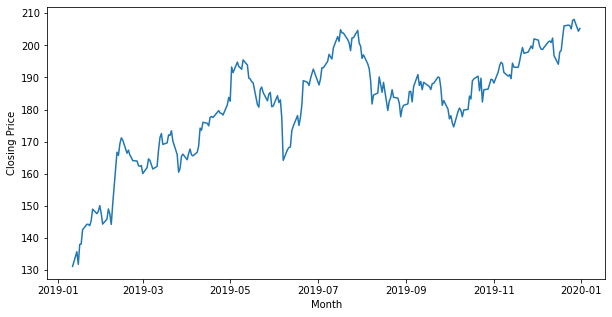

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(df.TimeIndex, df.Close)
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.show()

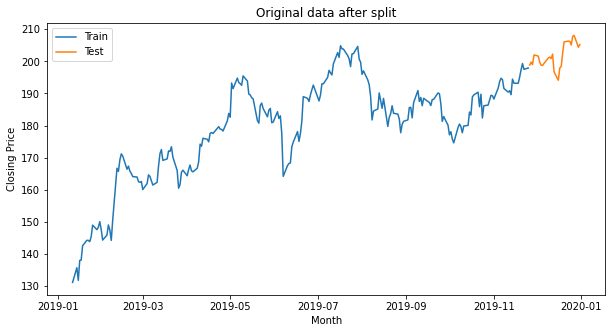

In [102]:
train = df[0:int(len(df)*0.9)] 
test= df[int(len(df)*0.9):]

plt.figure(figsize=(10, 5))
plt.plot(train.TimeIndex, train.Close, label = 'Train')
plt.plot(test.TimeIndex, test.Close,  label = 'Test')

plt.legend(loc = 'best')
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.title('Original data after split')
plt.show()

In [103]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [104]:
from sklearn.metrics import  mean_squared_error

In [105]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Close']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


For alpha = 0.00,  RMSE is 70.6222 


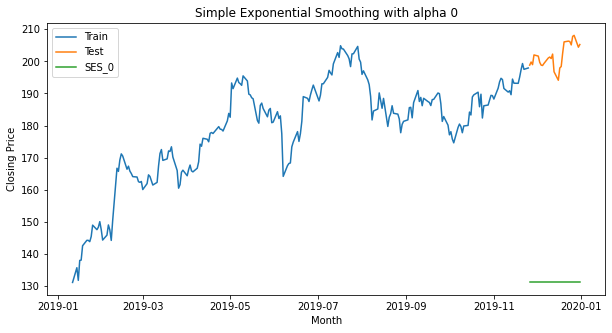

In [106]:
alpha_value = 0

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.10,  RMSE is 8.9709 


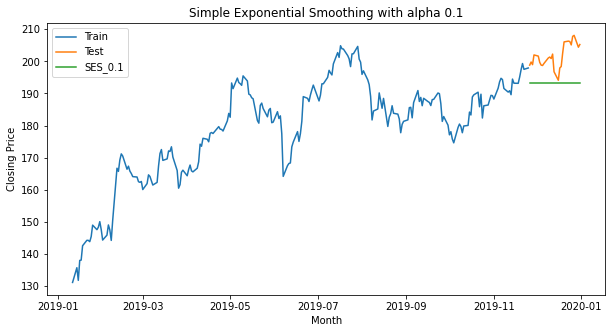

In [107]:
alpha_value = 0.1

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.50,  RMSE is 5.2666 


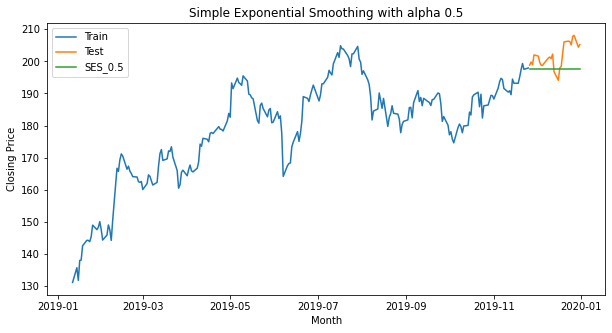

In [108]:
alpha_value = 0.5

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.90,  RMSE is 5.1337 


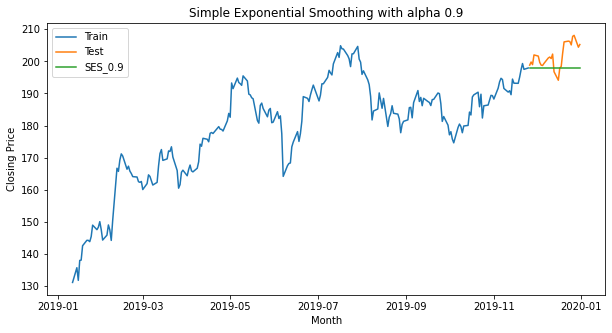

In [109]:
alpha_value = 0.9

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.99,  RMSE is 5.1178 


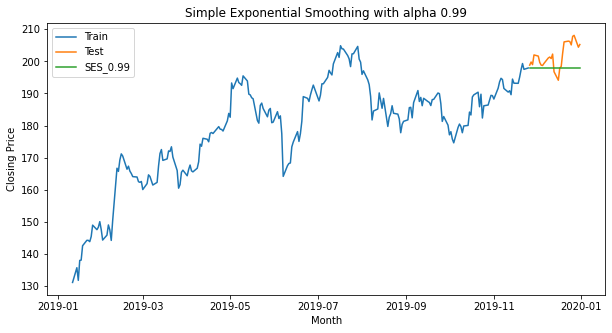

In [110]:
alpha_value = 0.99

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,



Simple Exponential Smoothing 


Smoothing Level 0.9828
Initial Level 131.1678

For alpha = 0.98,  RMSE is 5.1197 


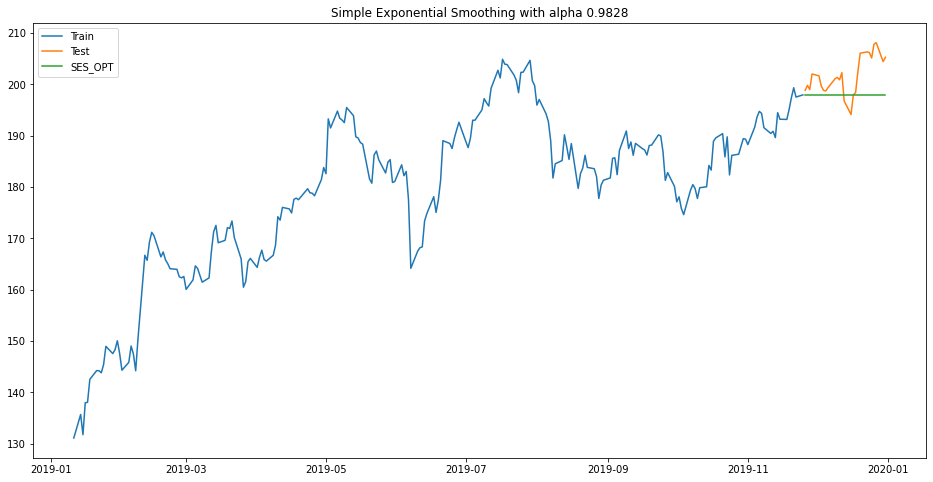

              227         228         229         230         231
Y_hat  197.923297  197.923297  197.923297  197.923297  197.923297
Y      198.820007  199.789993  198.970001  202.000000  201.639999


In [111]:
pred_opt   =  SimpleExpSmoothing(train['Close']).fit(optimized = True)
print('')
print('Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(pred_opt.params['smoothing_level'], 4))
print('Initial Level',   np.round(pred_opt.params['initial_level'], 4))
print('')

y_pred_opt           = pred_opt.forecast(steps = 26)
df_pred_opt          = pd.DataFrame({'Y_hat':y_pred_opt,'Y':test['Close'].values})

rmse_opt             =  np.sqrt(mean_squared_error(test['Close'], y_pred_opt))

alpha_value          = np.round(pred_opt.params['smoothing_level'], 4)

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['Close'], label = 'Train')
plt.plot(test.TimeIndex, test['Close'],  label = 'Test')
plt.plot(test.TimeIndex, y_pred_opt,           label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

print(df_pred_opt.head().T)

# **Holt’s Method**

In [112]:
from   statsmodels.tsa.holtwinters import  Holt
model_holt = Holt(np.asarray(train['Close']))

model_fit = model_holt.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.974
Initial Level 130.9036



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [113]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Close']))

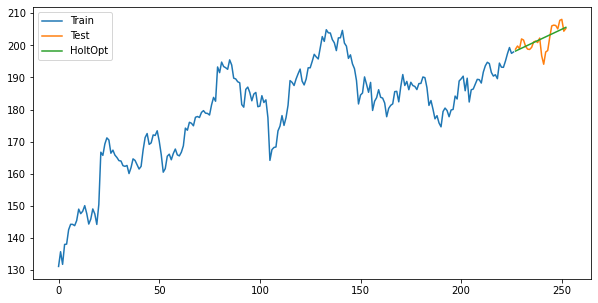

In [114]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [115]:
df_pred_opt =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Close'].values})
rmse_opt =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

For alpha = 0.97,  RMSE is 2.7621 


# **Holt-Winters’ Method**

In [116]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

pred1 = ExponentialSmoothing(np.asarray(train['Close']), trend='additive', damped_trend=False, seasonal='additive',
                                  seasonal_periods = 74).fit()
alpha_value = np.round(pred1.params['smoothing_level'], 4)
### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 26)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Close']})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


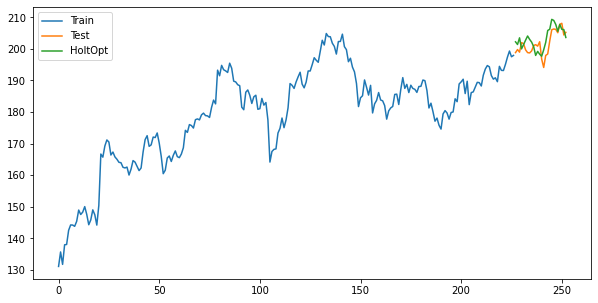

In [117]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_pred1.Y_hat, label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [118]:
rmse =  np.sqrt(mean_squared_error(df_pred1.Y, df_pred1.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))

For alpha = 0.98,  RMSE is 3.2874 
